### **Overview**

Throughout this Project, we will be performing specific well-defined tasks that’ll strengthen our concepts in Explainable AI. We will be using the Breast Cancer Dataset and here is a brief context about the same:

Breast cancer is a type of cancer that develops in the breast tissue cells, the Cancer starts when cells begin to grow out of control. Breast cancer cells usually form a tumor that can often be seen on an x-ray or felt as a lump. Breast cancer occurs almost entirely in women, but men can get breast cancer, too.
A benign tumor is a tumor that does not invade its surrounding tissue or spread around the body. A malignant tumor is a tumor that may invade its surrounding tissue or spread around the body.

As part of this project, we will have to accomplish the below tasks.

<b><i>Author:<i/></b> **WILSON JOMO** [Thallium]

###**Dataset**

Dataset Link: https://raw.githubusercontent.com/dphi-official/Datasets/master/breast_cancer/Training_set_breastcancer.csv

**About the dataset:**

Different features related to the breast are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe the characteristics of the cell nuclei present in the image.


* id: Id number
* agnosis: Cancer is Malignant or Benign (M = malignant, B = benign) - target variable

Other 20 features contain information about following 10 real valued features

* radius (mean of distances from center to points on the perimeter)
* texture (standard deviation of gray-scale values) 
* perimeter 
* area 
* smoothness (local variation in radius lengths) 
* compactness (perimeter^2 / area - 1.0) 
* concavity (severity of concave portions of the contour) 
* concave points (number of concave portions of the contour) 
* symmetry  
* fractal dimension ("coastline approximation" - 1)

# Task 1

## Import Necessary Libraries

In [1]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 9.5 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import shap

## Load the data
Display the first 5 rows of the data after loading.

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/breast_cancer/Training_set_breastcancer.csv")

In [4]:
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,914102,13.16,20.54,84.06,538.7,0.07335,0.05275,0.01800,0.01256,0.1713,...,28.46,95.29,648.3,0.1118,0.1646,0.07698,0.04195,0.2687,0.07429,B
1,91858,11.75,17.56,75.89,422.9,0.10730,0.09713,0.05282,0.04440,0.1598,...,27.98,88.52,552.3,0.1349,0.1854,0.13660,0.10100,0.2478,0.07757,B
2,88466802,10.65,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,...,35.19,77.98,455.7,0.1499,0.1398,0.11250,0.06136,0.3409,0.08147,B
3,9111843,12.00,28.23,76.77,442.5,0.08437,0.06450,0.04055,0.01945,0.1615,...,37.88,85.07,523.7,0.1208,0.1856,0.18110,0.07116,0.2447,0.08194,B
4,84862001,16.13,20.68,108.10,798.8,0.11700,0.20220,0.17220,0.10280,0.2164,...,31.48,136.80,1315.0,0.1789,0.4233,0.47840,0.20730,0.3706,0.11420,M


## Perform Basic Exploratory Data Analysis (EDA)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       398 non-null    int64  
 1   radius_mean              398 non-null    float64
 2   texture_mean             398 non-null    float64
 3   perimeter_mean           398 non-null    float64
 4   area_mean                398 non-null    float64
 5   smoothness_mean          398 non-null    float64
 6   compactness_mean         398 non-null    float64
 7   concavity_mean           398 non-null    float64
 8   concave points_mean      398 non-null    float64
 9   symmetry_mean            398 non-null    float64
 10  fractal_dimension_mean   398 non-null    float64
 11  radius_se                398 non-null    float64
 12  texture_se               398 non-null    float64
 13  perimeter_se             398 non-null    float64
 14  area_se                  3

In [6]:
df.isna().sum()

id                         0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
diagnosis                  0
dtype: int64

In [7]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,3.980000e+02,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,...,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,3.076209e+07,14.070997,19.331985,91.589121,651.631910,0.096289,0.103197,0.087454,0.047821,0.181122,...,16.202219,25.647286,106.882337,876.737186,0.132595,0.249983,0.269575,0.112627,0.288792,0.083445
std,1.277890e+08,3.577839,4.221225,24.706388,358.679197,0.012988,0.050805,0.079728,0.038329,0.026829,...,4.898797,6.171891,34.370030,581.202196,0.022235,0.150280,0.210256,0.065617,0.058800,0.016469
min,8.913000e+03,6.981000,10.720000,43.790000,143.500000,0.052630,0.026500,0.000000,0.000000,0.106000,...,7.930000,12.870000,50.410000,185.200000,0.084840,0.043270,0.000000,0.000000,0.156500,0.055040
25%,8.674750e+05,11.645000,16.172500,74.690000,415.375000,0.086635,0.066013,0.028010,0.019787,0.161650,...,12.980000,20.807500,83.730000,510.325000,0.116875,0.148600,0.116500,0.063532,0.250050,0.071240
50%,9.055295e+05,13.205000,18.895000,85.660000,538.300000,0.096515,0.095090,0.059935,0.033420,0.179300,...,14.800000,25.225000,96.085000,671.500000,0.131600,0.211750,0.223050,0.100465,0.280650,0.080210
75%,8.812818e+06,15.745000,21.660000,103.700000,780.325000,0.105300,0.129550,0.126675,0.068282,0.195675,...,18.540000,29.622500,125.075000,1048.500000,0.146375,0.330650,0.377400,0.157250,0.316875,0.091990
max,9.113205e+08,28.110000,33.810000,188.500000,2501.000000,0.132600,0.345400,0.426400,0.191300,0.290600,...,36.040000,49.540000,251.200000,4254.000000,0.222600,0.937900,1.252000,0.291000,0.577400,0.148600


In [8]:
df.columns

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis'],
      dtype='object')

In [9]:
num_features = [cols for cols in df.columns if df[cols].dtype != 'o']
num_features = df[num_features]

In [10]:
categor_features = [cols for cols in df.columns if df[cols].dtype == 'o']
categor_features = df[categor_features]

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


<Axes: >

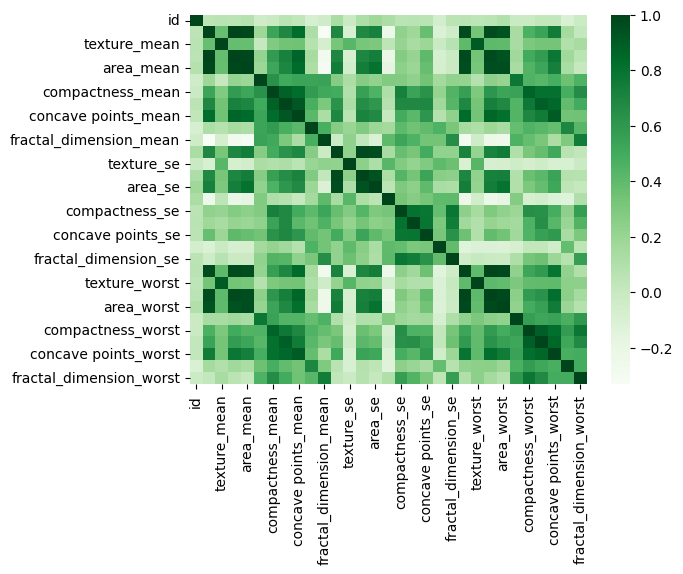

In [11]:
corr = num_features.corr()
sns.heatmap(corr, cmap='Greens')

## Split the data into Train and Test Sets
The train to test ratio should be 80:20 and the random_state should be 0.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('diagnosis', axis=1), df['diagnosis'], test_size=0.2, random_state=42)

# Task 2

## Use Random Forest Machine Learning Algorithm for prediction

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
#Create a Gaussian Classifier
rfc = RandomForestClassifier(n_estimators=100)
#Train the Model
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [15]:
#Make predictions
y_pred = rfc.predict(X_test)

## Evaluate the model using Accuracy Score

In [16]:
from sklearn.metrics import accuracy_score
print("Accuracy :", accuracy_score(y_test, y_pred))

Accuracy : 0.95


In [17]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score
print(classification_report(y_test, y_pred, digits=4))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           B     0.9583    0.9583    0.9583        48
           M     0.9375    0.9375    0.9375        32

    accuracy                         0.9500        80
   macro avg     0.9479    0.9479    0.9479        80
weighted avg     0.9500    0.9500    0.9500        80



array([[46,  2],
       [ 2, 30]])

# Task 3: Explaining the model with SHAP

##  Use a SHAP Explainer to derive SHAP Values for the random forest ml model.

In [27]:
X_test

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
198,911296202,27.420,26.27,186.90,2501.0,0.10840,0.19880,0.36350,0.16890,0.2061,...,36.04,31.37,251.20,4254.0,0.13570,0.4256,0.6833,0.26250,0.2641,0.07427
396,903483,8.734,16.84,55.27,234.3,0.10390,0.07428,0.00000,0.00000,0.1985,...,10.17,22.80,64.01,317.0,0.14600,0.1310,0.0000,0.00000,0.2445,0.08865
33,8810955,14.190,23.81,92.87,610.7,0.09463,0.13060,0.11150,0.06462,0.2235,...,16.86,34.85,115.00,811.3,0.15590,0.4059,0.3744,0.17720,0.4724,0.10260
208,916799,18.310,20.58,120.80,1052.0,0.10680,0.12480,0.15690,0.09451,0.1860,...,21.86,26.20,142.20,1493.0,0.14920,0.2536,0.3759,0.15100,0.3074,0.07863
93,913063,12.450,16.41,82.85,476.7,0.09514,0.15110,0.15440,0.04846,0.2082,...,13.78,21.03,97.82,580.6,0.11750,0.4061,0.4896,0.13420,0.3231,0.10340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,859196,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,0.2341,...,10.01,19.23,65.59,310.1,0.09836,0.1678,0.1397,0.05087,0.3282,0.08490
225,8910988,21.750,20.99,147.30,1491.0,0.09401,0.19610,0.21950,0.10880,0.1721,...,28.19,28.18,195.90,2384.0,0.12720,0.4725,0.5807,0.18410,0.2833,0.08858
367,86973702,14.440,15.18,93.97,640.1,0.09970,0.10210,0.08487,0.05532,0.1724,...,15.85,19.85,108.60,766.9,0.13160,0.2735,0.3103,0.15990,0.2691,0.07683
175,852781,18.610,20.25,122.10,1094.0,0.09440,0.10660,0.14900,0.07731,0.1697,...,21.31,27.26,139.90,1403.0,0.13380,0.2117,0.3446,0.14900,0.2341,0.07421


In [28]:
#creating an explainer for our model
explainer = shap.TreeExplainer(rfc)

# finding the shap values using the explainer
shap_values = explainer.shap_values(X_test)

In [29]:
# Expected/Base/Reference value = the value that would be predicted if we didn't know any features of the current output
print("Expected Value :", explainer.expected_value[0])

Expected Value : 0.6338993710691825


In [30]:
pd.DataFrame(shap_values[0]).head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.002502,-0.050008,-0.008577,-0.046318,-0.028604,-0.003485,-0.005513,-0.029037,-0.046287,-0.000844,...,-0.069381,-0.008925,-0.092041,-0.077838,-0.003894,-0.010322,-0.012792,-0.060536,0.002871,0.000169
1,0.000826,0.032898,0.002380,0.033985,0.021619,-0.000337,0.003003,0.014048,0.030502,0.000563,...,0.048041,0.003768,0.054345,0.050364,-0.003047,0.003866,0.010881,0.038864,0.004308,0.002831
2,0.001899,-0.007671,-0.015860,-0.039346,-0.000881,-0.003973,-0.009473,-0.042950,-0.084422,-0.003327,...,-0.033587,-0.035239,-0.070218,-0.028490,-0.022116,-0.022068,-0.021417,-0.112554,-0.019307,-0.008998
3,0.002140,-0.053110,-0.003657,-0.048096,-0.031393,-0.002942,-0.000078,-0.030323,-0.052533,-0.000059,...,-0.079450,-0.005893,-0.108184,-0.087098,-0.009358,0.002633,-0.007834,-0.047420,0.000584,0.000367
4,0.001251,0.033464,0.008079,0.040332,0.022081,0.000209,-0.001635,-0.042481,-0.013575,-0.000624,...,0.065333,0.009867,0.066666,0.059239,0.009024,-0.014541,-0.014769,-0.008320,0.003299,-0.002006


# Task 4

## Plot a SHAP force plot for the first row of test data.

In [31]:
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X_test.iloc[0,:])

## Inferences from the generated plot.

More Likely to be classified as B,
Due to the value of area_worst and radius_worst's impact.

Low probability of classification when area worst and radius worst are lower than the mean and opposite for concavity_mean, perimeter worst being over mean respectively.





# Task 5

## Plot a SHAP force plot for all the rows of the data

In [32]:
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0][:80,:], X_test.iloc[:80,:])

## Inferences from the generated plot.

1. Radius worst increases - classfication 
as M is more probable.
2. area worst increases - classfication as M is more probable.
3. area worst increases - classfication as M is more probable.
4. As perimeter_Se increases further than 4.2 - the classification of M is more likely.

# Task 6

## Plot a SHAP summary plot using all the features in the data

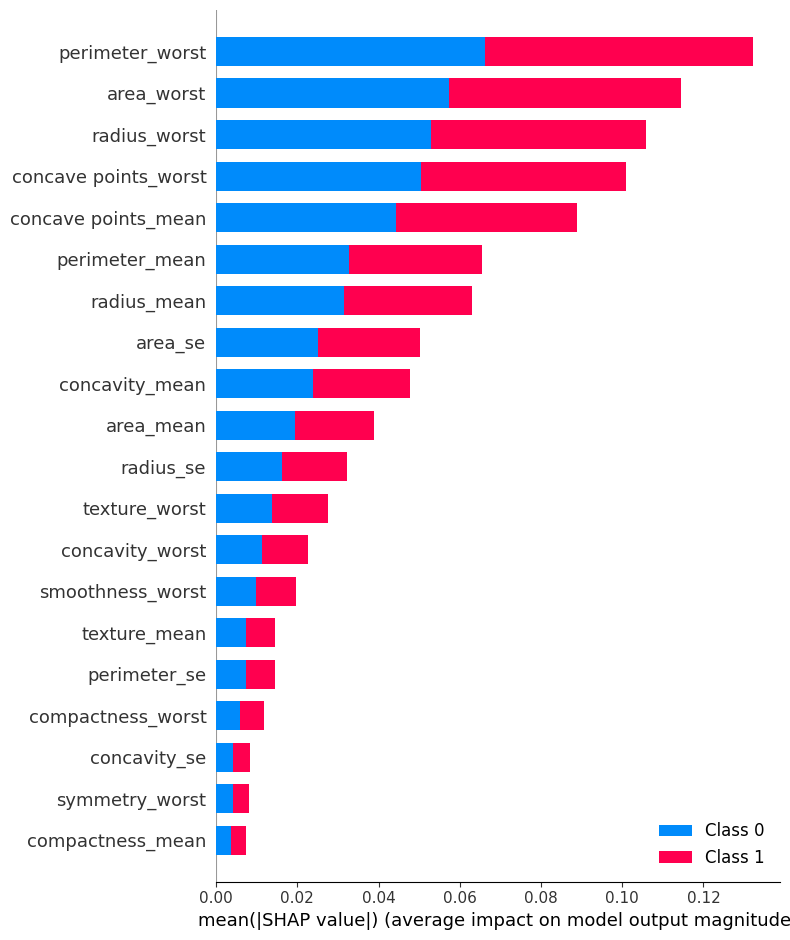

In [36]:
shap.initjs()
shap.summary_plot(shap_values, X_test)

## Inferences from the generated plot.



*   radius_worst, area_worst, perimeter_worst have highest impact in classification as 0 and 1
*  The least impactful variables are symmetry_worst, id and radius_se





# Task 7

##Plot a SHAP dependecne plot using all features in the data

In [37]:
df.columns

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis'],
      dtype='object')

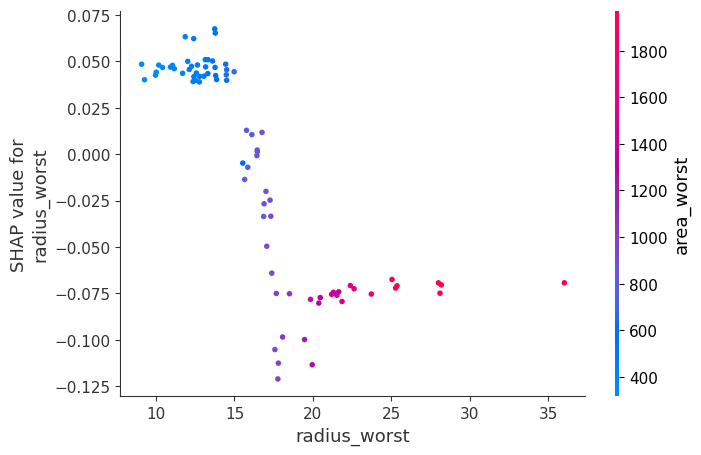

In [38]:
shap.initjs()
shap.dependence_plot(ind='radius_worst', interaction_index='area_worst', shap_values=shap_values[0], features=X_test)

## Inferences from the generated plot.

Higher radius_worst as compared to lower shap_values of radius_worst push the model towards classifying M...and vice versa